In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Multi-Layer Perceptron (MLP) class
class MLP:
    def __init__(self, input_size=2, hidden_sizes=[4, 4], output_size=1, learning_rate=0.01, epochs=100):
        self.weights = []
        self.biases = []
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights and biases for hidden layers
        for size in hidden_sizes:
            self.weights.append(np.random.rand(input_size, size))
            self.biases.append(np.zeros((1, size)))
            input_size = size

        # Initialize weights and biases for output layer
        self.weights.append(np.random.rand(input_size, output_size))
        self.biases.append(np.zeros((1, output_size)))

    def forward(self, inputs):
        # Forward pass
        layer_output = inputs
        layer_outputs = [inputs]

        for w, b in zip(self.weights, self.biases):
            layer_input = np.dot(layer_output, w) + b
            layer_output = sigmoid(layer_input)
            layer_outputs.append(layer_output)

        return layer_outputs

    def backward(self, inputs, labels, layer_outputs):
        # Backward pass
        output_error = labels - layer_outputs[-1]
        output_delta = output_error * layer_outputs[-1] * (1 - layer_outputs[-1])

        deltas = [output_delta]

        # Calculate deltas for hidden layers
        for i in range(len(self.weights) - 2, -1, -1):
            error = deltas[-1].dot(self.weights[i + 1].T)
            delta = error * layer_outputs[i + 1] * (1 - layer_outputs[i + 1])
            deltas.append(delta)

        # Reverse the order of deltas for consistency
        deltas = deltas[::-1]

        # Update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] += self.learning_rate * layer_outputs[i].T.dot(deltas[i])
            self.biases[i] += self.learning_rate * np.sum(deltas[i], axis=0, keepdims=True)

    def train(self, inputs, labels):
        for epoch in range(self.epochs):
            for input_data, label in zip(inputs, labels):
                layer_outputs = self.forward(input_data.reshape(1, -1))
                self.backward(input_data.reshape(1, -1), label.reshape(1, -1), layer_outputs)

# Get XOR dataset
x = pd.read_csv('./XOR/XXOR.csv', header=None)
x.columns = ['X', 'Y']
y = pd.read_csv('./XOR/YXOR.csv', header=None)
y.columns = ['Class']

x







,X,Y
0,0.141117,0.078580
1,-0.005747,-0.039122
2,0.094092,0.040520
3,0.049805,-0.002619
4,-0.168823,-0.011247
...,...,...
95,0.935282,1.047225
96,1.093041,0.982468
97,0.857808,1.199796
98,0.914345,0.845841


In [67]:
y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


In [68]:
import numpy as np

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_der(x):
    return x * (1.0 - x)

class NN:
    def __init__(self, inputs):
        self.inputs = inputs
        self.l = len(self.inputs)
        self.li = len(self.inputs[0])

        self.wi = np.random.random((self.li, self.l))
        self.wh = np.random.random((self.l, 1))
        self.accuracies = []  # List to store accuracies for each epoch

    def think(self, inp):
        s1 = sigmoid(np.dot(inp, self.wi))
        s2 = sigmoid(np.dot(s1, self.wh))
        return s2

    def train(self, inputs, outputs, it):
        for epoch in range(it):
            l0 = inputs
            l1 = sigmoid(np.dot(l0, self.wi))
            l2 = sigmoid(np.dot(l1, self.wh))

            l2_err = outputs - l2
            l2_delta = np.multiply(l2_err, sigmoid_der(l2))

            l1_err = np.dot(l2_delta, self.wh.T)
            l1_delta = np.multiply(l1_err, sigmoid_der(l1))

            self.wh += np.dot(l1.T, l2_delta)
            self.wi += np.dot(l0.T, l1_delta)

            # Calculate and save accuracy for the current epoch
            accuracy = np.mean(np.abs(l2_err))
            self.accuracies.append(accuracy)
            print(f"Epoch {epoch + 1}/{it}, Accuracy: {1 - accuracy}")

        return self.accuracies

# Example usage:
# Assuming you have inputs and outputs defined somewhere
# inputs = np.array([...])
# outputs = np.array([...])

# Create the neural network
nn = NN(inputs)

# Train the neural network for 100 epochs (you can adjust this number)
accuracies = nn.train(inputs, outputs, 100)

# Print or use the accuracies list as needed
print("Accuracies:", accuracies)


Epoch 1/100, Accuracy: 0.5025338096988838
Epoch 2/100, Accuracy: 0.5019390373588251
Epoch 3/100, Accuracy: 0.5013249557075947
Epoch 4/100, Accuracy: 0.5007975765924033
Epoch 5/100, Accuracy: 0.5004232538535529
Epoch 6/100, Accuracy: 0.5001910705011237
Epoch 7/100, Accuracy: 0.5000530701701784
Epoch 8/100, Accuracy: 0.4999698533936532
Epoch 9/100, Accuracy: 0.4999187233868365
Epoch 10/100, Accuracy: 0.4998871955619676
Epoch 11/100, Accuracy: 0.4998679746699184
Epoch 12/100, Accuracy: 0.4998565624633109
Epoch 13/100, Accuracy: 0.49985011471890584
Epoch 14/100, Accuracy: 0.4998468186695568
Epoch 15/100, Accuracy: 0.4998455177343769
Epoch 16/100, Accuracy: 0.4998454747752876
Epoch 17/100, Accuracy: 0.4998462206485159
Epoch 18/100, Accuracy: 0.49984745715394596
Epoch 19/100, Accuracy: 0.4998489949567355
Epoch 20/100, Accuracy: 0.49985071396944725
Epoch 21/100, Accuracy: 0.4998525381153637
Epoch 22/100, Accuracy: 0.49985441927384566
Epoch 23/100, Accuracy: 0.4998563270757953
Epoch 24/100, Ac

In [69]:
x

,X,Y
0,0.141117,0.078580
1,-0.005747,-0.039122
2,0.094092,0.040520
3,0.049805,-0.002619
4,-0.168823,-0.011247
...,...,...
95,0.935282,1.047225
96,1.093041,0.982468
97,0.857808,1.199796
98,0.914345,0.845841


In [70]:
y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


In [71]:
x = np.array(x)
y = np.array(y)


In [72]:
xor = NN(x)
print(xor.think(x))
xor.train(x, y, 10000)
print(xor.think(x))


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Epoch 1/10000, Accuracy: 0.500000000016108
Epoch 2/10000, Accuracy: 0.500000000016108
Epoch 3/10000, Accuracy: 0.500000000016108
Epoch 4/10000, Accuracy: 0.500000000016108
Epoch 5/10000, Accuracy: 0.500000000016108
Epoch 6/10000, Accuracy: 0.500000000016108
Epoch 7/10000, Accuracy: 0.500000000016108
Epoch 8/10000, Accuracy: 0.500000000016108
Epoch 9/10000, Accuracy: 0.500000000016108
Epoch 10/100

Epoch 79/10000, Accuracy: 0.500000000016108
Epoch 80/10000, Accuracy: 0.500000000016108
Epoch 81/10000, Accuracy: 0.500000000016108
Epoch 82/10000, Accuracy: 0.500000000016108
Epoch 83/10000, Accuracy: 0.500000000016108
Epoch 84/10000, Accuracy: 0.500000000016108
Epoch 85/10000, Accuracy: 0.500000000016108
Epoch 86/10000, Accuracy: 0.500000000016108
Epoch 87/10000, Accuracy: 0.500000000016108
Epoch 88/10000, Accuracy: 0.500000000016108
Epoch 89/10000, Accuracy: 0.500000000016108
Epoch 90/10000, Accuracy: 0.500000000016108
Epoch 91/10000, Accuracy: 0.500000000016108
Epoch 92/10000, Accuracy: 0.500000000016108
Epoch 93/10000, Accuracy: 0.500000000016108
Epoch 94/10000, Accuracy: 0.500000000016108
Epoch 95/10000, Accuracy: 0.500000000016108
Epoch 96/10000, Accuracy: 0.500000000016108
Epoch 97/10000, Accuracy: 0.500000000016108
Epoch 98/10000, Accuracy: 0.500000000016108
Epoch 99/10000, Accuracy: 0.500000000016108
Epoch 100/10000, Accuracy: 0.500000000016108
Epoch 101/10000, Accuracy: 0.50

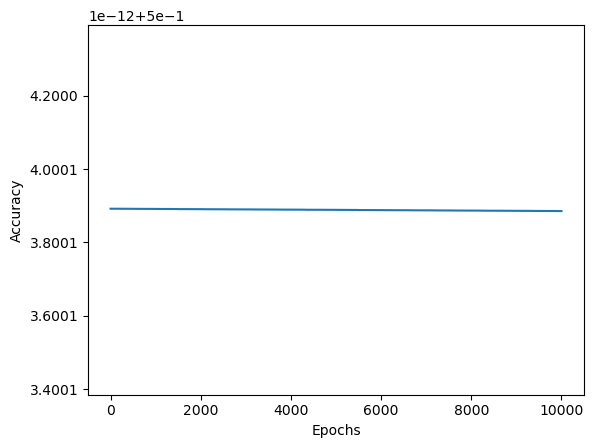

In [73]:
# plot the accuracies
plt.plot(range(1, len(xor.accuracies) + 1), xor.accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [82]:
import tensorflow as tf
import numpy as np

# Definir los datos de entrada y salida
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
salidas = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Definir el modelo de red neuronal
modelo = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(2,), activation='relu'),  # Capa oculta con dos nodos y activación ReLU
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida con un nodo y activación sigmoide
])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(entradas, salidas, epochs=10000, verbose=0)

# Evaluar el modelo
puntuacion = modelo.evaluate(entradas, salidas)
print("Precisión del modelo:", puntuacion[1])

# Hacer predicciones
predicciones = modelo.predict(entradas)
print("Predicciones:")
print(predicciones)


2023-11-19 20:24:34.197820: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 94ms/step - loss: 0.6931 - accuracy: 0.5000
Precisión del modelo: 0.5
1/1 [==============================] - 0s 43ms/step
Predicciones:
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


In [78]:
import numpy as np

# Función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada de la función sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Datos de entrada y salida para XOR
inputs = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])

outputs = np.array([[0], [1], [1], [0]])

# Inicialización de pesos y sesgos
input_size = 2
hidden_size = 2
output_size = 1

# Pesos y sesgos de la capa oculta
weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))
bias_hidden = np.zeros((1, hidden_size))

# Pesos y sesgos de la capa de salida
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))
bias_output = np.zeros((1, output_size))

# Hiperparámetros
learning_rate = 0.1
epochs = 100

losses = []
# Entrenamiento del modelo
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(inputs, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # Calcular la pérdida
    loss = 0.5 * np.mean((final_output - outputs) ** 2)

    # Backpropagation
    error = outputs - final_output
    d_output = error * sigmoid_derivative(final_output)

    hidden_layer_error = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = hidden_layer_error * sigmoid_derivative(hidden_output)

    # Actualizar pesos y sesgos
    weights_hidden_output += hidden_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += inputs.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')
        losses.append(loss)


# Hacer predicciones
predicted_output = sigmoid(np.dot(sigmoid(np.dot(inputs, weights_input_hidden) + bias_hidden), weights_hidden_output) + bias_output)
print("\nPredicciones finales:")
print(predicted_output)


Epoch 0, Loss: 0.15519325321749178

Predicciones finales:
[[0.47424062]
 [0.4940212 ]
 [0.51752675]
 [0.53367683]]


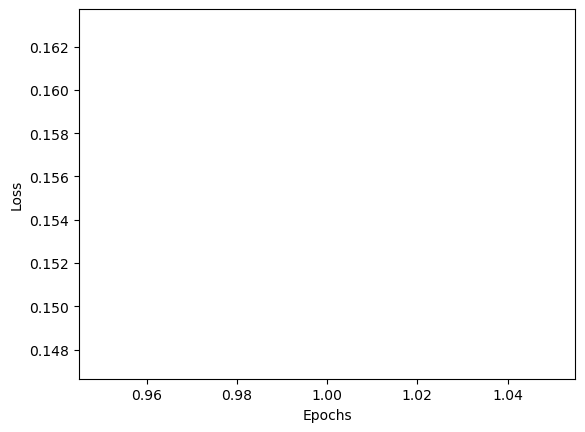

In [81]:
# Plot the losses
import matplotlib.pyplot as plt
plt.plot(range(1, len(losses) + 1), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [114]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, weights=None):
        self.weights = weights
        self.bias = np.random.rand()
        self.accuracy = []

    def activate(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activate(weighted_sum)
        return output

    def train(self, training_inputs, labels, epochs, learning_rate):
        for epoch in range(epochs):
            correct_predictions = 0  # Inicializamos el contador de predicciones correctas
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

                # Si la predicción es correcta, incrementamos el contador
                if prediction == label:
                    correct_predictions += 1

            # Calculamos y mostramos la precisión por época
            accuracy = correct_predictions / len(labels)
            self.accuracy.append(1/accuracy)
            print(f'Época {epoch + 1}/{epochs}, Precisión: {accuracy}')

# Definimos las entradas de entrenamiento y las salidas esperadas para XOR
training_inputs = pd.read_csv('./XOR/XXOR.csv', header=None)
training_inputs.columns = ['X', 'Y']
labels = pd.read_csv('./XOR/YXOR.csv', header=None)
labels.columns = ['Class']

training_inputs = np.array(training_inputs)
labels = np.array(labels)

# Creamos un perceptrón con 2 entradas
perceptron = Perceptron(input_size=2, weights=np.random.rand(2))

# Entrenamos el perceptrón con los datos de entrenamiento
perceptron.train(training_inputs, labels, epochs=100, learning_rate=0.001)


Época 1/100, Precisión: 0.5
Época 2/100, Precisión: 0.5
Época 3/100, Precisión: 0.5
Época 4/100, Precisión: 0.5
Época 5/100, Precisión: 0.5
Época 6/100, Precisión: 0.5
Época 7/100, Precisión: 0.5
Época 8/100, Precisión: 0.48
Época 9/100, Precisión: 0.44
Época 10/100, Precisión: 0.4
Época 11/100, Precisión: 0.41
Época 12/100, Precisión: 0.44
Época 13/100, Precisión: 0.45
Época 14/100, Precisión: 0.47
Época 15/100, Precisión: 0.47
Época 16/100, Precisión: 0.47
Época 17/100, Precisión: 0.48
Época 18/100, Precisión: 0.49
Época 19/100, Precisión: 0.5
Época 20/100, Precisión: 0.5
Época 21/100, Precisión: 0.5
Época 22/100, Precisión: 0.5
Época 23/100, Precisión: 0.5
Época 24/100, Precisión: 0.5
Época 25/100, Precisión: 0.5
Época 26/100, Precisión: 0.5
Época 27/100, Precisión: 0.51
Época 28/100, Precisión: 0.53
Época 29/100, Precisión: 0.58
Época 30/100, Precisión: 0.58
Época 31/100, Precisión: 0.69
Época 32/100, Precisión: 0.82
Época 33/100, Precisión: 0.85
Época 34/100, Precisión: 0.87
Época

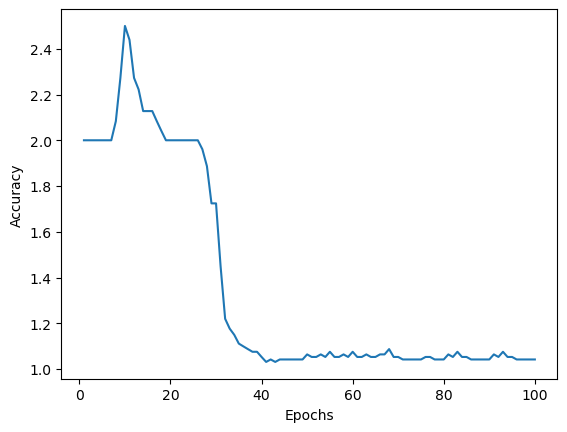

In [115]:
# Plot the accuracies
import matplotlib.pyplot as plt
plt.plot(range(1, len(perceptron.accuracy) + 1), perceptron.accuracy)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [116]:
# predicciones
print("Predicciones:")
print(perceptron.predict(np.array([0.049805240468285675,-0.0026192237344250485])))

Predicciones:
1


Epoch: 0 Accuracy: 0.5
Epoch: 1 Accuracy: 0.5
Epoch: 2 Accuracy: 0.5
Epoch: 3 Accuracy: 0.5
Epoch: 4 Accuracy: 0.5
Epoch: 5 Accuracy: 0.5
Epoch: 6 Accuracy: 0.5
Epoch: 7 Accuracy: 0.5
Epoch: 8 Accuracy: 0.5
Epoch: 9 Accuracy: 0.5
Epoch: 10 Accuracy: 0.5
Epoch: 11 Accuracy: 0.5
Epoch: 12 Accuracy: 0.5
Epoch: 13 Accuracy: 0.5
Epoch: 14 Accuracy: 0.5
Epoch: 15 Accuracy: 0.5
Epoch: 16 Accuracy: 0.5
Epoch: 17 Accuracy: 0.5
Epoch: 18 Accuracy: 0.5
Epoch: 19 Accuracy: 0.5
Epoch: 20 Accuracy: 0.5
Epoch: 21 Accuracy: 0.5
Epoch: 22 Accuracy: 0.75
Epoch: 23 Accuracy: 0.75
Epoch: 24 Accuracy: 0.75
Epoch: 25 Accuracy: 0.75
Epoch: 26 Accuracy: 0.75
Epoch: 27 Accuracy: 0.75
Epoch: 28 Accuracy: 0.75
Epoch: 29 Accuracy: 0.75
Epoch: 30 Accuracy: 0.75
Epoch: 31 Accuracy: 0.75
Epoch: 32 Accuracy: 0.75
Epoch: 33 Accuracy: 0.75
Epoch: 34 Accuracy: 0.75
Epoch: 35 Accuracy: 0.75
Epoch: 36 Accuracy: 0.75
Epoch: 37 Accuracy: 0.75
Epoch: 38 Accuracy: 0.75
Epoch: 39 Accuracy: 0.75
Epoch: 40 Accuracy: 0.75
Epoch: 

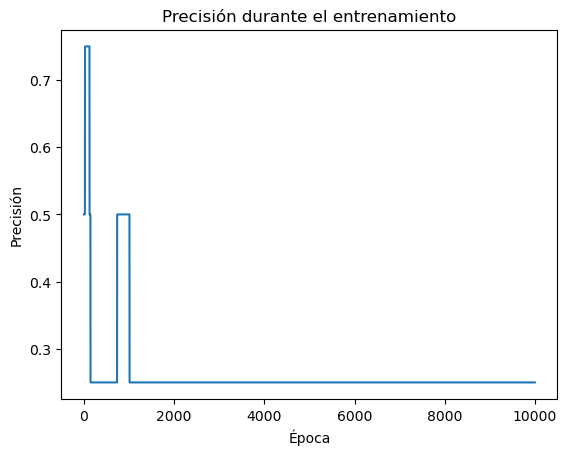

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, input_size=2):
        self.weights = np.random.rand(input_size + 1)  # +1 for the bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * prediction * (1 - prediction) * inputs
                self.weights[0] += self.learning_rate * error * prediction * (1 - prediction)

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))

# Definimos las entradas de entrenamiento y las salidas esperadas para XOR
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 0])

# Creamos un perceptrón con 2 entradas
perceptron = Perceptron(learning_rate=0.01, epochs=10000, input_size=2)

# Entrenamos el perceptrón con los datos de entrenamiento
perceptron.train(training_inputs, labels)

# Mostramos la precisión por época
plt.plot(perceptron.accuracies)
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.show()


Epoch: 0 Accuracy: 50.0
Epoch: 1 Accuracy: 50.0
Epoch: 2 Accuracy: 50.0
Epoch: 3 Accuracy: 50.0
Epoch: 4 Accuracy: 50.0
Epoch: 5 Accuracy: 50.0
Epoch: 6 Accuracy: 50.0
Epoch: 7 Accuracy: 50.0
Epoch: 8 Accuracy: 50.0
Epoch: 9 Accuracy: 50.0
Epoch: 10 Accuracy: 50.0
Epoch: 11 Accuracy: 50.0
Epoch: 12 Accuracy: 50.0
Epoch: 13 Accuracy: 50.0
Epoch: 14 Accuracy: 50.0
Epoch: 15 Accuracy: 50.0
Epoch: 16 Accuracy: 50.0
Epoch: 17 Accuracy: 50.0
Epoch: 18 Accuracy: 50.0
Epoch: 19 Accuracy: 50.0
Epoch: 20 Accuracy: 50.0
Epoch: 21 Accuracy: 50.0
Epoch: 22 Accuracy: 50.0
Epoch: 23 Accuracy: 50.0
Epoch: 24 Accuracy: 50.0
Epoch: 25 Accuracy: 50.0
Epoch: 26 Accuracy: 50.0
Epoch: 27 Accuracy: 50.0
Epoch: 28 Accuracy: 50.0
Epoch: 29 Accuracy: 50.0
Epoch: 30 Accuracy: 50.0
Epoch: 31 Accuracy: 50.0
Epoch: 32 Accuracy: 50.0
Epoch: 33 Accuracy: 50.0
Epoch: 34 Accuracy: 50.0
Epoch: 35 Accuracy: 50.0
Epoch: 36 Accuracy: 50.0
Epoch: 37 Accuracy: 50.0
Epoch: 38 Accuracy: 50.0
Epoch: 39 Accuracy: 50.0
Epoch: 40 

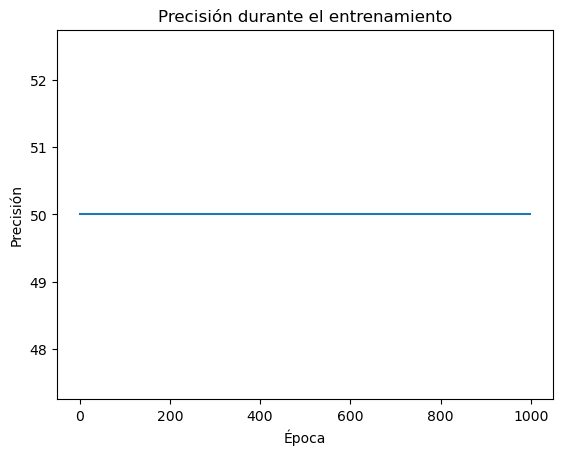

In [99]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, input_size=2):
        self.weights = np.random.rand(input_size + 1)  # +1 for the bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def activate(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activate(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [self.predict(inputs) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))

# Definimos las entradas de entrenamiento y las salidas esperadas para XOR
training_inputs = pd.read_csv('./XOR/XXOR.csv', header=None)
training_inputs.columns = ['X', 'Y']
labels = pd.read_csv('./XOR/YXOR.csv', header=None)
labels.columns = ['Class']

training_inputs = np.array(training_inputs)
labels = np.array(labels)

# Creamos un perceptrón con 2 entradas
perceptron = Perceptron(learning_rate=0.1, epochs=1000, input_size=2)

# Entrenamos el perceptrón con los datos de entrenamiento
perceptron.train(training_inputs, labels)

# Mostramos la precisión por época
plt.plot(perceptron.accuracies)
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.show()
